## Dependencies and Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn.impute import SimpleImputer

import tpot
from tpot import TPOTClassifier
import parfit.parfit as pf 
from sklearn.model_selection import ParameterGrid
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier

import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score 
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score



In [2]:
Q1 = pd.read_csv('LoanStats_2018Q1.csv', skiprows=1)
Q2 = pd.read_csv('LoanStats_2018Q2.csv', skiprows=1)
Q3 = pd.read_csv('LoanStats_2018Q3.csv', skiprows=1)
Q4 = pd.read_csv('LoanStats_2018Q4.csv', skiprows=1)


/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (0,123,124,125,128,129,130,133) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (0,123,124,125,128,129,130,133,138,139,140) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## Initial interrogation and preparation of data

In [3]:
def quick_analysis(df):
     print("Data Types:")
     print(df.dtypes)
     print("Rows and Columns:")
     print(df.shape)
     print("Column Names:")
     print(df.columns)
     print("Null Values:")
     print(df.apply(lambda x: sum(x.isnull()) / len(df)))

In [4]:
quick_analysis(Q1)

Data Types:
id                                             object
member_id                                     float64
loan_amnt                                     float64
funded_amnt                                   float64
funded_amnt_inv                               float64
term                                           object
int_rate                                       object
installment                                   float64
grade                                          object
sub_grade                                      object
emp_title                                      object
emp_length                                     object
home_ownership                                 object
annual_inc                                    float64
verification_status                            object
issue_d                                        object
loan_status                                    object
pymnt_plan                                     object
url             

In [5]:
Q1.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,35000.0,35000.0,35000.0,60 months,13.58%,806.79,C,C2,...,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,24000.0,24000.0,24000.0,36 months,21.85%,914.71,D,D5,...,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,2500.0,2500.0,2500.0,36 months,6.71%,76.87,A,A3,...,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,15350.0,15350.0,15350.0,36 months,6.07%,467.47,A,A2,...,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,10000.0,10000.0,10000.0,60 months,16.01%,243.24,C,C5,...,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
Q1.tail()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
107861,NaN,NaN,4375.0,4375.0,4375.0,36 months,14.08%,149.70,C,C3,...,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
107862,NaN,NaN,12000.0,12000.0,11975.0,36 months,10.42%,389.58,B,B3,...,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
107863,NaN,NaN,14000.0,14000.0,13975.0,36 months,13.59%,475.71,C,C2,...,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
107864,Total amount funded in policy code 1: 1741781700,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
107865,Total amount funded in policy code 2: 564202131,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### On inspection, the bottom two rows of each table contains information in the ID column only. Therefore, they need to be removed to enable further analysis.

In [7]:
# Note: important to only run this once
Q1 = Q1.drop(Q1.tail(2).index)
Q2 = Q2.drop(Q2.tail(2).index)
Q3 = Q3.drop(Q3.tail(2).index)
Q4 = Q4.drop(Q4.tail(2).index)


In [8]:
# To check it has been successfully removed
Q1.tail()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
107859,NaN,NaN,5000.0,5000.0,4975.0,36 months,12.62%,167.56,C,C1,...,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
107860,NaN,NaN,6000.0,6000.0,6000.0,36 months,10.91%,196.18,B,B4,...,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
107861,NaN,NaN,4375.0,4375.0,4375.0,36 months,14.08%,149.70,C,C3,...,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
107862,NaN,NaN,12000.0,12000.0,11975.0,36 months,10.42%,389.58,B,B3,...,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
107863,NaN,NaN,14000.0,14000.0,13975.0,36 months,13.59%,475.71,C,C2,...,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN


### It will also be useful to join the dataframes now:

In [9]:
Loans2018 = pd.concat([Q1,Q2,Q3, Q4])

## 2a. What are the total number of loans?

In [10]:
nrows = Loans2018.shape[0]
print("The total number of loans in 2018 was",nrows)

The total number of loans in 2018 was 495242


In [11]:
# We can confirm this by adding up the rows in each quarter
total_check = Q1.shape[0] + Q2.shape[0] + Q3.shape[0] + Q4.shape[0]
print("For confirmation: The total number of loans in 2018 was",total_check)

For confirmation: The total number of loans in 2018 was 495242


## 2b. How many columns does the dataset have? 

In [12]:
ncols = Loans2018.shape[1]
print("The total number of columns is", ncols)

The total number of columns is 144


In [13]:
# Confirming same value in datasets from each quarters
print("For confirmation: In each quarter, the columns were",Q1.shape[1],",", Q2.shape[1],",",Q2.shape[1],",",Q4.shape[1],".")


For confirmation: In each quarter, the columns were 144 , 144 , 144 , 144 .


## 2c. How many columns contain missing data?

In [14]:
cols_missing_data = 0

for i in range(ncols):
    if Loans2018.iloc[:,i].isnull().values.any():
        cols_missing_data += 1

print("The total number of columns containing missing data is",cols_missing_data)

The total number of columns containing missing data is 62


## 2c. What is the count of missing data for each of these columns?

In [15]:
for i in range(ncols):
    if Loans2018.iloc[:,i].isnull().values.any():
#       Function which sums the total number of missing values in the column
        num_null = Loans2018.iloc[:,i].isnull().values.sum()

#       Statement to print number of missing columns
        col_name = Loans2018.iloc[:,i].name
        print("The number of missing data in column",col_name,"is",num_null)


The number of missing data in column id is 495242
The number of missing data in column member_id is 495242
The number of missing data in column emp_title is 54659
The number of missing data in column emp_length is 41987
The number of missing data in column url is 495242
The number of missing data in column desc is 495242
The number of missing data in column dti is 1132
The number of missing data in column mths_since_last_delinq is 276652
The number of missing data in column mths_since_last_record is 432258
The number of missing data in column revol_util is 592
The number of missing data in column last_pymnt_d is 636
The number of missing data in column next_pymnt_d is 85562
The number of missing data in column last_credit_pull_d is 5
The number of missing data in column mths_since_last_major_derog is 380409
The number of missing data in column annual_inc_joint is 426257
The number of missing data in column dti_joint is 426257
The number of missing data in column verification_status_joi

## 2d. How many loans are still current?

#### Firstly, we will create a list of all column names. This will enable us to inspect which columns may be relevant.

In [16]:
col_names = list(Loans2018)
col_names


['id',
 'member_id',
 'loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'term',
 'int_rate',
 'installment',
 'grade',
 'sub_grade',
 'emp_title',
 'emp_length',
 'home_ownership',
 'annual_inc',
 'verification_status',
 'issue_d',
 'loan_status',
 'pymnt_plan',
 'url',
 'desc',
 'purpose',
 'title',
 'zip_code',
 'addr_state',
 'dti',
 'delinq_2yrs',
 'earliest_cr_line',
 'inq_last_6mths',
 'mths_since_last_delinq',
 'mths_since_last_record',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'initial_list_status',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_d',
 'last_pymnt_amnt',
 'next_pymnt_d',
 'last_credit_pull_d',
 'collections_12_mths_ex_med',
 'mths_since_last_major_derog',
 'policy_code',
 'application_type',
 'annual_inc_joint',
 'dti_joint',
 'verification_status_joint',
 'acc_now_delinq',
 'tot_coll_amt',
 'tot_cur_

#### On visual inspection, the column 'loan_status' appears most relevant.

#### We can visualise this column further:


In [17]:
Loans2018['loan_status']


0                    Current
1                    Current
2                    Current
3                    Current
4                    Current
5                    Current
6                    Current
7                    Current
8                    Current
9                    Current
10                   Current
11                Fully Paid
12                   Current
13                   Current
14                   Current
15                   Current
16                Fully Paid
17               Charged Off
18                   Current
19                   Current
20                Fully Paid
21                   Current
22                   Current
23                Fully Paid
24                   Current
25                   Current
26                   Current
27        Late (31-120 days)
28                Fully Paid
29                   Current
                 ...        
128382               Current
128383               Current
128384               Current
128385        

#### This confirms that this is the appropriate column.

In [18]:
loans_current = Loans2018['loan_status'].loc[Loans2018['loan_status'] == 'Current']
num_current = loans_current.size

print("The total number of loans that are still current is",num_current)


The total number of loans that are still current is 395475


## 3 and 4. Exploring the "fully paid" and "charged off" loans dataset

In [19]:
# Create a subset of dataset of "fully paid" and "charged off" loans
loans_subset = Loans2018.loc[(Loans2018['loan_status'] == 'Fully Paid') | (Loans2018['loan_status'] == "Charged Off")]

In [20]:
loans_subset

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
11,NaN,NaN,10000.0,10000.0,10000.0,60 months,14.07%,233.05,C,C3,...,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
16,NaN,NaN,7000.0,7000.0,7000.0,36 months,11.98%,232.44,B,B5,...,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
17,NaN,NaN,20000.0,20000.0,20000.0,60 months,26.77%,607.97,E,E5,...,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
20,NaN,NaN,21000.0,21000.0,21000.0,60 months,20.39%,560.94,D,D4,...,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
23,NaN,NaN,30000.0,30000.0,30000.0,36 months,7.34%,930.99,A,A4,...,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
28,NaN,NaN,18500.0,18500.0,18500.0,36 months,13.58%,628.52,C,C2,...,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
32,NaN,NaN,10000.0,10000.0,10000.0,36 months,6.71%,307.45,A,A3,...,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
40,NaN,NaN,5000.0,5000.0,5000.0,36 months,13.58%,169.87,C,C2,...,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
43,NaN,NaN,3000.0,3000.0,3000.0,36 months,7.34%,93.10,A,A4,...,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
48,NaN,NaN,12500.0,12500.0,12500.0,36 months,7.34%,387.91,A,A4,...,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN


#### (i) Basic descriptions

In [21]:
loans_subset.describe()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,url,desc,dti,delinq_2yrs,...,deferral_term,hardship_amount,hardship_length,hardship_dpd,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,settlement_amount,settlement_percentage,settlement_term
count,0.0,85562.000000,85562.000000,85562.000000,85562.000000,8.556200e+04,0.0,0.0,85337.000000,85562.000000,...,95.0,95.000000,95.0,95.000000,18.000000,95.000000,95.000000,1002.000000,1002.000000,1002.000000
mean,NaN,14989.365314,14989.365314,14985.916641,448.553353,7.959393e+04,NaN,NaN,18.725496,0.235911,...,3.0,192.631789,3.0,15.210526,683.616667,14933.294421,207.209263,7154.550719,50.933403,18.570858
std,NaN,10031.851554,10031.851554,10031.267111,291.114836,7.392400e+04,NaN,NaN,20.233720,0.745523,...,0.0,137.644413,0.0,8.447453,415.592853,8810.166447,212.979134,4889.554259,8.274366,6.781112
min,NaN,1000.000000,1000.000000,725.000000,30.120000,0.000000e+00,NaN,NaN,0.000000,0.000000,...,3.0,5.950000,3.0,0.000000,151.860000,424.110000,0.070000,413.930000,29.920000,1.000000
25%,NaN,7000.000000,7000.000000,7000.000000,230.410000,4.624250e+04,NaN,NaN,10.520000,0.000000,...,3.0,89.925000,3.0,8.500000,341.115000,7805.830000,45.360000,3466.597500,45.000000,16.250000
50%,NaN,12000.000000,12000.000000,12000.000000,366.420000,6.600000e+04,NaN,NaN,16.840000,0.000000,...,3.0,163.650000,3.0,16.000000,696.855000,14231.460000,148.560000,5823.000000,45.020000,20.000000
75%,NaN,20000.000000,20000.000000,20000.000000,614.990000,9.500000e+04,NaN,NaN,24.130000,0.000000,...,3.0,273.050000,3.0,22.000000,1064.355000,21097.230000,301.365000,9904.750000,60.000000,24.000000
max,NaN,40000.000000,40000.000000,40000.000000,1670.150000,9.300000e+06,NaN,NaN,999.000000,19.000000,...,3.0,649.970000,3.0,29.000000,1369.860000,32300.260000,1072.990000,28503.000000,98.240000,24.000000


#### (ii) Understanding loan amount

In [67]:
loans_subset['loan_amnt'] = loans_subset['loan_amnt'].astype(np.int)

In [23]:
x = loans_subset['loan_amnt']

(array([10466., 16554., 17506., 11223.,  9375.,  4125.,  5006.,  4437.,
         3671.,  3199.]),
 array([ 1000.,  4900.,  8800., 12700., 16600., 20500., 24400., 28300.,
        32200., 36100., 40000.]),
 <a list of 10 Patch objects>)

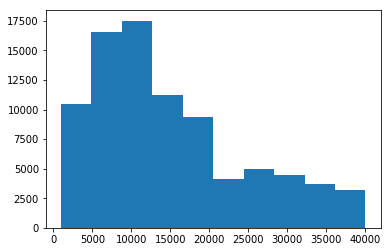

In [24]:
# Visualise the distribution
plt.hist(x ,10)

In [25]:
# Basic parameters
print("The range of loan sizes is from",np.min(x),"to",np.max(x))
print("The average loan amount is", np.mean(x))
print("The median loan amount is", np.median(x))

The range of loan sizes is from 1000 to 40000
The average loan amount is 14989.36531404128
The median loan amount is 12000.0


#### (iii) Analysing variation in different subcategories

In [26]:

### STEP 1: SELECT A SUBSET (comment out all but desired subset) ###

# Whole dataset ##
temp = loans_subset
print('\033[1m' + "For all loans:" + '\033[0m')


## Divided by loan size ##

# temp = loans_subset.loc[loans_subset['loan_amnt'] <= 10000]
# print('\033[1m' + "For loans below 10,000:" + '\033[0m')

# temp = loans_subset.loc[(loans_subset['loan_amnt'] > 10000) & (loans_subset['loan_amnt'] <=20000)]
# print('\033[1m' + "For loans between 10,000 and 20,000:" + '\033[0m')

# temp = loans_subset.loc[(loans_subset['loan_amnt'] > 20000) & (loans_subset['loan_amnt'] <=30000)]
# print('\033[1m' + "For loans between 20,000 and 30,000:" + '\033[0m')

# temp = loans_subset.loc[(loans_subset['loan_amnt'] > 30000) & (loans_subset['loan_amnt'] <=40000)]
# print('\033[1m' + "For loans between 30,000 and 40,000:" + '\033[0m')


## Divided by risk grade ##

# temp = loans_subset.loc[loans_subset['grade'] == 'A']
# print('\033[1m' + "For loans of risk grade A:" + '\033[0m')

# temp = loans_subset.loc[loans_subset['grade'] == 'B']
# print('\033[1m' + "For loans of risk grade B:" + '\033[0m')

# temp = loans_subset.loc[loans_subset['grade'] == 'C']
# print('\033[1m' + "For loans of risk grade C:" + '\033[0m')

# temp = loans_subset.loc[loans_subset['grade'] == 'D']
# print('\033[1m' + "For loans of risk grade D:" + '\033[0m')

# temp = loans_subset.loc[loans_subset['grade'] == 'E']
# print('\033[1m' + "For loans of risk grade E:" + '\033[0m')


## Further subsets to be added, as per preference ##


### STEP 2: ANALYSIS ###

# Loan size
loans_below10k = len(temp.loc[temp['loan_amnt'] <= 10000])
loans_10to20k = len(temp.loc[(temp['loan_amnt'] > 10000) & (temp['loan_amnt'] <=20000)])
loans_20to30k = len(temp.loc[(temp['loan_amnt'] > 20000) & (temp['loan_amnt'] <=30000)])
loans_30to40k = len(temp.loc[(temp['loan_amnt'] > 30000) & (temp['loan_amnt'] <=40000)])

print("Loan size: \n",loans_below10k,"loans are below 10,000 \n",loans_10to20k,"loans are between 10,000 and 20,000 \n",
     loans_20to30k,"loans are between 20,000 and 30,000 \n",loans_30to40k,"loans are between 30,000 and 40,000 \n")


# Property ownership
rent = len(temp.loc[temp['home_ownership'] == 'RENT'])
percent_rent = round((rent/len(temp))*100,2)
mortgage = len(temp.loc[temp['home_ownership'] == 'MORTGAGE'])
percent_mortgage = round((mortgage/len(temp))*100,2)
own = len(temp.loc[temp['home_ownership'] == 'OWN'])    
percent_own = round((own/len(temp))*100,2)

print("Property ownership: \n",rent,"rent their property (",percent_rent,"%) \n",mortgage,
      "have a mortgage (",percent_mortgage,"%) \n",own,"own their own property (",percent_own,"%) \n")

                
# Purpose
debt = len(temp.loc[temp['purpose'] == 'debt_consolidation'])
percent_debt = round((debt/len(temp))*100,2)
credit = len(temp.loc[temp['purpose'] == 'credit_card'])
percent_credit = round((credit/len(temp))*100,2)
home = len(temp.loc[temp['purpose'] == 'home_improvement'])
percent_home = round((home/len(temp))*100,2)


print("Purpose: \n",debt,"to consolidate debts (",percent_debt,"%)\n",credit,
      "to pay off a credit card (",percent_credit,"%)\n",home,"for home improvement (",percent_home,"%)\n")


# Risk grade
A = len(temp.loc[temp['grade'] == 'A'])
percent_A = round((A/len(temp))*100,2)
B = len(temp.loc[temp['grade'] == 'B'])
percent_B = round((B/len(temp))*100,2)
C = len(temp.loc[temp['grade'] == 'C'])
percent_C = round((C/len(temp))*100,2)
D = len(temp.loc[temp['grade'] == 'D'])
percent_D = round((D/len(temp))*100,2)
E = len(temp.loc[temp['grade'] == 'E'])
percent_E = round((E/len(temp))*100,2)

print("Risk levels: \n",A,"are risk grade A (",percent_A,"%) \n",B,"are risk grade B (",percent_B,"%) \n",
      C,"are risk grade C (",percent_C,"%) \n",D,"are risk grade D (",percent_D,"%) \n",
      E,"are risk grade E (",percent_E,"%) \n")


# Application type
individ = len(temp.loc[temp['application_type'] == 'Individual'])
percent_individ = round((individ/len(temp))*100,2)
joint = len(temp.loc[temp['application_type'] == 'Joint App'])
percent_joint = round((joint/len(temp))*100,2)

print("Application type: \n",individ,"are individual application (",percent_individ,"%)\n",
      joint,"are joint applications (",percent_joint,"%)\n")

For loans of risk grade E:
Loan size: 
 1585 loans are below 10,000 
 1634 loans are between 10,000 and 20,000 
 1098 loans are between 20,000 and 30,000 
 199 loans are between 30,000 and 40,000 

Property ownership: 
 1864 rent their property ( 41.28 %) 
 2036 have a mortgage ( 45.08 %) 
 613 own their own property ( 13.57 %) 

Purpose: 
 2695 to consolidate debts ( 59.68 %)
 566 to pay off a credit card ( 12.53 %)
 264 for home improvement ( 5.85 %)

Risk levels: 
 0 are risk grade A ( 0.0 %) 
 0 are risk grade B ( 0.0 %) 
 0 are risk grade C ( 0.0 %) 
 0 are risk grade D ( 0.0 %) 
 4516 are risk grade E ( 100.0 %) 

Application type: 
 3717 are individual application ( 82.31 %)
 799 are joint applications ( 17.69 %)



## 4. Summary

Loan sizes range from 1000 to 40000, with the average loan size of approximately 15000.

The majority of loans are to people who have a mortgage on their property (50.42%). As loan size increases, the proportion of people who are renting a property derease, the proportion of those mortgaging a property increases and the proportion who own their own property stays the same.

The most common purpose of the loans is to consolidate debts (52.16%), and the second most common is to pay off a credit card (20.93%).

The majority of loans are risk grades B and C. The proportion of low risk grades (A and B) is highest in smaller loans (below 10000) and larger loans (above 30000). The proportion of high risk grades (D and E) is highest in medium-sized loans (between 10000 and 30000).

The majority of applications are individual applications (87.32%). As the loan size increases, the proportion that are joint applications increases (from 8.81% for loans below 10000 to 21.41% from loans above 30000). As the risk grade increases, the proportion that are joint applications also increases (from 10.12% for risk grade A to 17.69% for risk grade E).



## 5. Predicting probability of loan being charged off: Removing columns

We will first eliminate the following columns because they are empty:
- <b>id</b>
- <b>member_id</b>
- <b>url</b>
- <b>desc</b>

This can be confirmed by running the following code:

<b>list(loans_subset['<em>column name</em>'].unique())</b>

which will return all the unique values contained within the column (which will only be NaN, in the case of an empty column).

In [27]:
list(loans_subset['id'].unique())


[nan]

In [28]:
loans_subset.drop('id', axis=1)
loans_subset.drop('member_id', axis=1)
loans_subset.drop('url', axis=1)
loans_subset.drop('desc', axis=1)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
11,NaN,NaN,10000,10000.0,10000.0,60 months,14.07%,233.05,C,C3,...,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
16,NaN,NaN,7000,7000.0,7000.0,36 months,11.98%,232.44,B,B5,...,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
17,NaN,NaN,20000,20000.0,20000.0,60 months,26.77%,607.97,E,E5,...,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
20,NaN,NaN,21000,21000.0,21000.0,60 months,20.39%,560.94,D,D4,...,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
23,NaN,NaN,30000,30000.0,30000.0,36 months,7.34%,930.99,A,A4,...,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
28,NaN,NaN,18500,18500.0,18500.0,36 months,13.58%,628.52,C,C2,...,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
32,NaN,NaN,10000,10000.0,10000.0,36 months,6.71%,307.45,A,A3,...,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
40,NaN,NaN,5000,5000.0,5000.0,36 months,13.58%,169.87,C,C2,...,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
43,NaN,NaN,3000,3000.0,3000.0,36 months,7.34%,93.10,A,A4,...,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
48,NaN,NaN,12500,12500.0,12500.0,36 months,7.34%,387.91,A,A4,...,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN


Next, we will eliminate columns where the majority is empty.

I have provisionally set the cut off at 90% missing data.

There is the possibility that relatively sparse data could still have a high predictive power, and therefore I have set the threshold relatively high.

The predictive ability of these columns can be assessed at a later stage and the threshold could be modified.


In [29]:
ncols = loans_subset.shape[1]
nrows = loans_subset.shape[0]
cols_to_remove = []

for i in range(ncols):
    if loans_subset.iloc[:,i].isnull().values.any():
#       Function which sums the total number of missing values in the column
        num_null = loans_subset.iloc[:,i].isnull().values.sum()

#       Statement to print number of missing columns
        col_name = loans_subset.iloc[:,i].name

#       Percentage of data that is missing
        percent_missing = round((num_null/nrows)*100,2)
        print("The number of missing data in column",col_name,"is",num_null,"which is",percent_missing,"percent.")

#       Set cut-off for removal at 90% missing data - can be changed
        if percent_missing > 90:
            cols_to_remove.append(i)
            print("As more than 90% of the column is missing data, the column",col_name," will be removed. \n")

# Removing the columns
loans_subset.drop(loans_subset.columns[cols_to_remove], axis=1, inplace=True)


The number of missing data in column id is 85562 which is 100.0 percent.
As more than 90% of the column is missing data, the column id  will be removed. 

The number of missing data in column member_id is 85562 which is 100.0 percent.
As more than 90% of the column is missing data, the column member_id  will be removed. 

The number of missing data in column emp_title is 8331 which is 9.74 percent.
The number of missing data in column emp_length is 7408 which is 8.66 percent.
The number of missing data in column url is 85562 which is 100.0 percent.
As more than 90% of the column is missing data, the column url  will be removed. 

The number of missing data in column desc is 85562 which is 100.0 percent.
As more than 90% of the column is missing data, the column desc  will be removed. 

The number of missing data in column dti is 225 which is 0.26 percent.
The number of missing data in column mths_since_last_delinq is 46992 which is 54.92 percent.
The number of missing data in column mt

/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [30]:
print("From the initial 144 columns, there are now",loans_subset.shape[1],"remaining.")


From the initial 144 columns, there are now 118 remaining.


Thirdly, we will remove columns that are duplicated.

On visual inspection, the columns 'loan_amnt', 'funded_amnt' and 'funded_amnt_inv' appear identical.

We can confirm that this is the case throughout the table with the following code:



In [65]:
# Converting format to floats, to enable direct mathematical comparison
loans_subset['loan_amnt'] = loans_subset['loan_amnt'].astype(np.float)
loans_subset['funded_amnt'] = loans_subset['funded_amnt'].astype(np.float)
loans_subset['funded_amnt_inv'] = loans_subset['funded_amnt_inv'].astype(np.float)


In [32]:
# Summing the difference between columns when subtracted
sum(loans_subset['loan_amnt'] - loans_subset['funded_amnt'])


0.0

There is no difference between the 'loan_amnt' and 'funded_amnt' columns.

In [33]:
sum(loans_subset['loan_amnt'] - loans_subset['funded_amnt_inv'])


295075.3460535714

However, there is a difference between the 'loan_amnt' and the 'funded_amnt_inv' columns.

Therefore, we should only drop the 'funded_amnt' column:

In [34]:
loans_subset.drop('funded_amnt', axis=1)


,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,...,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,hardship_flag,debt_settlement_flag
11,10000.0,10000.0,60 months,14.07%,233.05,C,C3,Teacher,4 years,RENT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,N
16,7000.0,7000.0,36 months,11.98%,232.44,B,B5,Parole,< 1 year,MORTGAGE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,N
17,20000.0,20000.0,60 months,26.77%,607.97,E,E5,Mental Health Provider,3 years,RENT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,N
20,21000.0,21000.0,60 months,20.39%,560.94,D,D4,Machine operator,10+ years,OWN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,N
23,30000.0,30000.0,36 months,7.34%,930.99,A,A4,Owner,3 years,OWN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,N
28,18500.0,18500.0,36 months,13.58%,628.52,C,C2,Teacher,6 years,MORTGAGE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,N
32,10000.0,10000.0,36 months,6.71%,307.45,A,A3,Maintenance mechanic 2,10+ years,OWN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,N
40,5000.0,5000.0,36 months,13.58%,169.87,C,C2,truck driver,< 1 year,RENT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,N
43,3000.0,3000.0,36 months,7.34%,93.10,A,A4,Deputy Recorder,10+ years,MORTGAGE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,N
48,12500.0,12500.0,36 months,7.34%,387.91,A,A4,Project Manager,3 years,MORTGAGE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,N


On visual inspection, the columns 'purpose' and 'title' are also indentical.

We shall remove 'title' as the data is in a less friendly format.


In [35]:
loans_subset.drop('title', axis=1)


,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,hardship_flag,debt_settlement_flag
11,10000.0,10000.0,10000.0,60 months,14.07%,233.05,C,C3,Teacher,4 years,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,N
16,7000.0,7000.0,7000.0,36 months,11.98%,232.44,B,B5,Parole,< 1 year,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,N
17,20000.0,20000.0,20000.0,60 months,26.77%,607.97,E,E5,Mental Health Provider,3 years,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,N
20,21000.0,21000.0,21000.0,60 months,20.39%,560.94,D,D4,Machine operator,10+ years,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,N
23,30000.0,30000.0,30000.0,36 months,7.34%,930.99,A,A4,Owner,3 years,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,N
28,18500.0,18500.0,18500.0,36 months,13.58%,628.52,C,C2,Teacher,6 years,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,N
32,10000.0,10000.0,10000.0,36 months,6.71%,307.45,A,A3,Maintenance mechanic 2,10+ years,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,N
40,5000.0,5000.0,5000.0,36 months,13.58%,169.87,C,C2,truck driver,< 1 year,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,N
43,3000.0,3000.0,3000.0,36 months,7.34%,93.10,A,A4,Deputy Recorder,10+ years,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,N
48,12500.0,12500.0,12500.0,36 months,7.34%,387.91,A,A4,Project Manager,3 years,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,N


## 6. Predicting probability of loan being charged off: Further preparation of data


#### Before dividing into training and test datasets:

We will convert our output of interest (the loan status) into a binary format, rather than the current string format:

In [64]:
loans_subset['loan_status'] = loans_subset['loan_status'].map({'Fully Paid':0,'Charged Off':1})


And we will similarly convert other variables into a numerical format by label encoding:

In [63]:
loans_subset['grade'] = loans_subset['grade'].map({'A':1,'B':2,'C':3,'D':4,'E':5})
loans_subset['application_type'] = loans_subset['application_type'].map({'Individual':1,'Joint App':2})
loans_subset['debt_settlement_flag'] = loans_subset['debt_settlement_flag'].map({'Y':1,'N':0})


We will create dummy variables for our non-numerical low cardinality variables:

In [38]:
dummy_cols = ['pymnt_plan','initial_list_status','home_ownership','verification_status','verification_status_joint','hardship_flag', 'purpose']
loans_subset = pd.get_dummies(loans_subset, columns = dummy_cols)


We will create bins for appropriate columns:

In [39]:
loans_subset['loan_amnt'] = loans_subset['loan_amnt'].astype(int)

In [40]:
# bins for loan amount
bins = [0, 10000, 20000, 30000, 40000]
group_names = ['0-10', '10-20', '20-30', '30-40']
loan_sizes = pd.cut(loans_subset['loan_amnt'], bins, labels=group_names)
loans_subset['loan_sizes'] = loan_sizes
loans_subset.drop('loan_amnt', axis=1)

loans_subset['loan_sizes'] = loans_subset['loan_sizes'].map({'0-10':1,'10-20':2, '20-30':3,'30-40':4})



In [41]:
# bins for annual income
bins = [0, 50000, 100000, 200000, 10000000]
group_names = ['0-50', '50-100', '100-200', '200-10mill']
annual_income = pd.cut(loans_subset['annual_inc'], bins, labels=group_names)
loans_subset['income_categories'] = annual_income
loans_subset.drop('annual_inc', axis=1)

loans_subset['income_categories'] = loans_subset['income_categories'].map({'0-50':1,'50-100':2, '100-200':3,'200-10mill':4})



We will review columns for data types that need converting before analysis 

In [42]:
def data_types(df):
     print("Data Types:")
     print(df.dtypes)

In [43]:
data_types(loans_subset.iloc[:,0:60])
data_types(loans_subset.iloc[:,60:120])
data_types(loans_subset.iloc[:,120:])

Data Types:
loan_amnt                        int64
funded_amnt                    float64
funded_amnt_inv                float64
term                            object
int_rate                        object
installment                    float64
grade                          float64
sub_grade                       object
emp_title                       object
emp_length                      object
annual_inc                     float64
issue_d                         object
loan_status                      int64
title                           object
zip_code                        object
addr_state                      object
dti                            float64
delinq_2yrs                    float64
earliest_cr_line                object
inq_last_6mths                 float64
mths_since_last_delinq         float64
mths_since_last_record         float64
open_acc                       float64
pub_rec                        float64
revol_bal                      float64
revol_util   

In [44]:
# Convert appropriate columns into np.datetime64
loans_subset['earliest_cr_line'] = loans_subset['earliest_cr_line'].astype(np.datetime64)
loans_subset['last_pymnt_d'] = loans_subset['last_pymnt_d'].astype(np.datetime64)
loans_subset['last_credit_pull_d'] = loans_subset['last_credit_pull_d'].astype(np.datetime64)
loans_subset['sec_app_earliest_cr_line'] = loans_subset['sec_app_earliest_cr_line'].astype(np.datetime64)


In [45]:
# Then split them into year and month 
loans_subset['earliest_cr_line_year'] = loans_subset['earliest_cr_line'].map(lambda x: x.year)
loans_subset['earliest_cr_line_month'] = loans_subset['earliest_cr_line'].map(lambda x: x.month)
loans_subset = loans_subset.drop('earliest_cr_line', axis=1)

loans_subset['last_pymnt_d_year'] = loans_subset['last_pymnt_d'].map(lambda x: x.year)
loans_subset['last_pymnt_d_month'] = loans_subset['last_pymnt_d'].map(lambda x: x.month)
loans_subset = loans_subset.drop('last_pymnt_d', axis=1)

loans_subset['last_credit_pull_d_year'] = loans_subset['last_credit_pull_d'].map(lambda x: x.year)
loans_subset['last_credit_pull_d_month'] = loans_subset['last_credit_pull_d'].map(lambda x: x.month)
loans_subset = loans_subset.drop('last_credit_pull_d', axis=1)

loans_subset['sec_app_earliest_cr_line_year'] = loans_subset['sec_app_earliest_cr_line'].map(lambda x: x.year)
loans_subset['sec_app_earliest_cr_line_month'] = loans_subset['sec_app_earliest_cr_line'].map(lambda x: x.month)
loans_subset = loans_subset.drop('sec_app_earliest_cr_line', axis=1)



In [46]:
## OPTIONAL: create dummy variables for each date variable. This will remove numerical linearity of months (1-12),
## but will more than double the number of our variables.

# dummy_cols = ['earliest_cr_line_year','earliest_cr_line_month','last_pymnt_d_year','last_pymnt_d_month',
#     'last_credit_pull_d_year','last_credit_pull_d_month','sec_app_earliest_cr_line_year',
#     'sec_app_earliest_cr_line_month']
# loans_subset = pd.get_dummies(loans_subset, columns = dummy_cols)


In [47]:
# convert interest rate and revol_util into floats
loans_subset['int_rate'] = loans_subset['int_rate'].str.replace(r'%','')
loans_subset['int_rate'] = loans_subset['int_rate'].str.replace(r' ','')
loans_subset['int_rate'] = loans_subset['int_rate'].astype(float)

loans_subset['revol_util'] = loans_subset['revol_util'].str.replace(r'%','')
loans_subset['revol_util'] = loans_subset['revol_util'].astype(float)

And we will drop any remaining variables that we don't think are important

In [48]:
# Drop sub_grade, as included within other variables
loans_subset = loans_subset.drop('sub_grade', axis=1)

# Drop employee title and length
loans_subset = loans_subset.drop('emp_title', axis=1)
loans_subset = loans_subset.drop('emp_length', axis=1)

# Drop purpose title, as duplicate
loans_subset = loans_subset.drop('title', axis=1)

# Drop term
loans_subset = loans_subset.drop('term', axis=1)

# Drop zip code and address state
loans_subset = loans_subset.drop('zip_code', axis=1)
loans_subset = loans_subset.drop('addr_state', axis=1)

    

We can confirm that all of the datatypes are now either float or int (except for issue_d, which we will use shortly):

In [49]:
data_types(loans_subset.iloc[:,0:60])
data_types(loans_subset.iloc[:,60:120])
data_types(loans_subset.iloc[:,120:])

Data Types:
loan_amnt                        int64
funded_amnt                    float64
funded_amnt_inv                float64
int_rate                       float64
installment                    float64
grade                          float64
annual_inc                     float64
issue_d                         object
loan_status                      int64
dti                            float64
delinq_2yrs                    float64
inq_last_6mths                 float64
mths_since_last_delinq         float64
mths_since_last_record         float64
open_acc                       float64
pub_rec                        float64
revol_bal                      float64
revol_util                     float64
total_acc                      float64
out_prncp                      float64
out_prncp_inv                  float64
total_pymnt                    float64
total_pymnt_inv                float64
total_rec_prncp                float64
total_rec_int                  float64
total_rec_lat

#### Finally, we will perform feature scaling on all our data

In [50]:

data = loans_subset.drop('issue_d', axis=1)
cols = loans_subset.drop('issue_d', axis=1).columns
index = loans_subset.index
issue_d = loans_subset['issue_d'].to_frame()

scaler = preprocessing.MinMaxScaler()

loans_subset = scaler.fit_transform(data)
loans_subset = pd.DataFrame(loans_subset, index=index, columns=cols)

loans_subset = pd.concat([loans_subset, issue_d], axis=1)


/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


### Dividing into training and test datasets

In [51]:
# Converting the 'issue_d' column to datetime64, to enable easier sorting by date
loans_subset['issue_d'] = loans_subset['issue_d'].astype(np.datetime64)

# Dividing based on months to the training and test sets
train_set = loans_subset.loc[loans_subset['issue_d'] <= '2018-09-30']
test_set = loans_subset.loc[loans_subset['issue_d'] > '2018-09-30']


In [62]:
# Divide issue_d into year and month for both training and test sets
train_set['issue_d_year'] = train_set['issue_d'].map(lambda x: x.year)
train_set['issue_d_month'] = train_set['issue_d'].map(lambda x: x.month)
train_set = train_set.drop('issue_d', axis=1)

test_set['issue_d_year'] = test_set['issue_d'].map(lambda x: x.year)
test_set['issue_d_month'] = test_set['issue_d'].map(lambda x: x.month)
test_set = test_set.drop('issue_d', axis=1)

In [53]:
# Check that there are no loans given outside 
values_outside_2018 = loans_subset.loc[(loans_subset['issue_d'] < '2018-01-01') | (loans_subset['issue_d'] > '2018-12-31')]
values_outside_2018.shape

(0, 137)

# Modelling the data

In [54]:
## SELECTING THE VARIABLES TO USE FOR TRAINING


## FULL DATASET
train_x = train_set.drop(['loan_status'], axis=1)
train_y = train_set['loan_status']

test_x = test_set.drop(['loan_status'], axis=1)
test_y = test_set['loan_status']


## SUBSET OF TOP GINI IMPORTANCES
## Note: Must run initial model and calculate gini importances first - code further down in notebook

## Select the number of variables to include
# indexNamesArr = importances.iloc[0:30].index.values
# listOfRowIndexLabels = list(indexNamesArr)
# train_x[listOfRowIndexLabels]

# train_x = train_set[listOfRowIndexLabels]
# train_y = train_set['loan_status']

# test_x = test_set[listOfRowIndexLabels]
# test_y = test_set['loan_status']


### Imputing missing data

In [55]:
# Now that the training and test datasets have been created, we will imputing for any remaining NaNs within the data
imp = SimpleImputer(missing_values=np.nan, strategy='median')

imp = imp.fit(train_x)
train_x_imp = imp.transform(train_x)

imp = imp.fit(test_x)
test_x_imp = imp.transform(test_x)

### 7. Selecting the model and hyperparameters, then training

#### Running TPOT to identify best model and hyperparameters

In [ ]:
pipeline_optimizer = TPOTClassifier(generations=5, population_size=20, cv=5,
                                    random_state=42, verbosity=2)
pipeline_optimizer.fit(train_x_imp, train_y)
print(pipeline_optimizer.score(test_x_imp, test_y))


#### Using Parfit to perform a Grid Search on the model identified above

In [402]:
# Grid Search

param_grid = ParameterGrid({
    "n_estimators": [100,200,300,400,500],
    "max_depth": [1,5,10],
    "min_samples_split": [2,5,10,20,50]
})


In [397]:
# split train into train and cross validation, using 'train_test_split'

X_train, X_val, y_train, y_val = train_test_split(train_x_imp, train_y, test_size=0.20, random_state=42)


In [378]:

best_model, best_score, all_models, all_scores = pf.bestFit(RandomForestClassifier, param_grid,
                                                            X_train, y_train, X_val, y_val,
                                                            metric = roc_auc_score,
                                                            scoreLabel = 'AUC')
print(best_model)


#### Based on the above, the best model is a Random Forest Classifier, with the following hyperparameters:
This makes intuitive sense given that we are using a high-dimensionality, imbalanced dataset. We must be careful when selecting hyperparameters to avoid overfitting.

After examining the dataset, and the skew towards a negative class ('loan_status' = 0), I opted to introduce a weighting towards the positive class. 


In [56]:
model = RandomForestClassifier(n_estimators=100, max_depth=2, min_samples_leaf=1, min_samples_split=5, random_state=0, verbose=0, class_weight={0:1, 1:9})


In [57]:
model.fit(train_x_imp, train_y)

RandomForestClassifier(bootstrap=True, class_weight={0: 1, 1: 9},
            criterion='gini', max_depth=2, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=5, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=None, oob_score=False, random_state=0,
            verbose=0, warm_start=False)

## 8. Testing the model

In [58]:
prediction = model.predict(test_x_imp)

# # ALTERNATIVE: use predict_proba to predict probability of the two classes
# prediction = model.predict_proba(test_x_imp)
# proba_predict = prediction[:,1]


In [59]:
accuracy = accuracy_score(test_y, prediction)
AUC = roc_auc_score(test_y, prediction)

print("The accuracy is ", "%.2f" %accuracy)
print("The AUC is ", "%.2f" %AUC)

The accuracy is  0.82
The AUC is  0.90


In [60]:
recall = recall_score(test_y, prediction, average='weighted', labels=np.unique(test_y))
precision = precision_score(test_y, prediction, average='weighted', labels=np.unique(test_y))
f1_score = f1_score(test_y, prediction, average='weighted', labels=np.unique(test_y))


print("The recall score is ", "%.2f" %recall)
print("The precision score is ", "%.2f" %precision)
print("The f1 score is ", "%.2f" %f1_score)


The recall score is  0.82
The precision score is  0.94
The f1 score is  0.85


In [61]:
confusion_matrix = confusion_matrix(test_y, prediction)
confusion_matrix

array([[7825, 1960],
       [   2, 1026]])

### Calculating gini importances

<function matplotlib.pyplot.show(*args, **kw)>

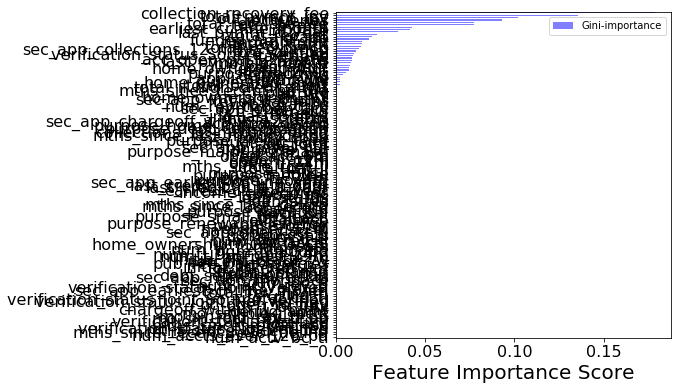

In [474]:
feats = {}
for feature, importance in zip(loans_subset.columns, model.feature_importances_):
    feats[feature] = importance
    
importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-importance'})
thing = importances.sort_values(by='Gini-importance').plot.barh(figsize=(6,6), color='b', alpha=0.5)

plt.xlabel('Feature Importance Score', fontsize=20)

plt.tick_params(labelsize=16)
plt.show


In [506]:
importances = importances.sort_values(by='Gini-importance', ascending=False)

In [505]:
importances[0:35]

,Gini-importance
collection_recovery_fee,0.178769
total_pymnt_inv,0.135396
out_prncp_inv,0.102207
recoveries,0.093162
total_rec_late_fee,0.077447
total_pymnt,0.077269
earliest_cr_line_month,0.042402
int_rate,0.041626
last_pymnt_d_year,0.034699
total_rec_int,0.022834


## Brief Summary

Initial interrogation of the data informed the appropriate preprocessing steps, including imputation and feature scaling.

TPOT, as well as Grid Search with an AUC performance metric, were used to identify the appropriate model and hyperparameters.

The result was a random forest classifier with 100 trees and a maximum depth of 2, presumably to reduce overfitting risk. Based on a skew towards the negative class, weighting towards the positive class was introduced in the model.

Doing so enabled development of a well-performing model, with an AUC of 0.9, accuracy of 0.82 and an F1 score of 0.85. The most common error type is a Type I error, where the classifier predicts a loan will be charged off when it will actually be fully paid. For the likely purpose of this analysis, such an error is preferable to a Type II error.

Calculating the Gini Importances for the features demonstrated a good spread across the top 30 variables. While we are not given explicit definitions of variables, from the column titles it appears that the most strongly predictive variables are those related to recoveries, late fees, total loan amount and interest rate and grade, all of which make intuitive sense.

### OPTIONAL: Plotting ROC curve and Precision-Recall curve when using predict_proba

In [480]:
fpr, tpr, threshold = metrics.roc_curve(test_y, proba_predict)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

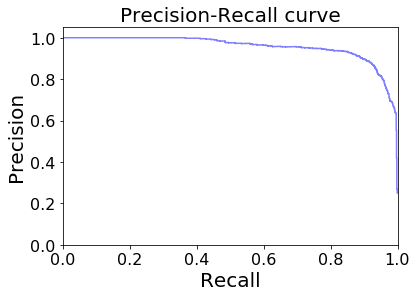

In [372]:
precision, recall, _ = precision_recall_curve(test_y, proba_predict)

plt.step(recall,precision,color='b',alpha=0.5,
        where='post')

plt.xlabel('Recall', fontsize=20)
plt.ylabel('Precision',fontsize=20)
plt.ylim([0,1.05])
plt.xlim([0,1.00])
plt.title('Precision-Recall curve', fontsize=20)

plt.tick_params(labelsize=16)

plt.show
